# Table of Contents
 <p><div class="lev1"><a href="#Imports"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev1"><a href="#Paths"><span class="toc-item-num">2&nbsp;&nbsp;</span>Paths</a></div><div class="lev1"><a href="#Functions"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions</a></div><div class="lev1"><a href="#Load-and-recode"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load and recode</a></div><div class="lev1"><a href="#How-many-SNPs-do-we-have-per-single-scaffold-end?"><span class="toc-item-num">5&nbsp;&nbsp;</span>How many SNPs do we have per single scaffold end?</a></div><div class="lev2"><a href="#Do-the-left-and-right-ends-mostly-behave-the-same-(I-think-they-SHOULD)?"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Do the left and right ends mostly behave the same (I think they SHOULD)?</a></div>

# Imports

In [1]:
%matplotlib inline

In [2]:
import seaborn as sns

import pandas as pd

from scipy import stats as sstats

from multiprocessing import Pool

In [3]:
sns.set_context('talk')
sns.set_style('whitegrid')

# Paths

In [14]:
WIN = 100000
ld_= "/home/gus/MEGAsync/zim/main/Yale/Projects/G_fuscipes/ddRAD/scaffold_organization_ld/pipeline_results/testing_development_ends_100K_win_10kb/interscaff_ld/scaffold_ends.indep.interchrom.geno.ld"

# Functions

In [10]:
from functools import partial

def recode_and_add_end_labels(df, win):
    """Recode and add end labels."""
    df.rename(columns={'R^2': 'R2'}, inplace=True)
    df["CHR1_END"] = df.POS1.apply(lambda i: "left" if i < win else "right")
    df["CHR2_END"] = df.POS2.apply(lambda i: "left" if i < win else "right")

def do_per_chunk(chunk, win):
    """Run this code for each chunk."""
    recode_and_add_end_labels(df=chunk,win=win)
    return chunk.groupby(["CHR1","CHR1_END"])['POS1'].unique().apply(lambda x: len(x)).unstack()

def indep_snps_per_scaff_end(ld_path, chunksize=6000000, ld_window=100000, procs=None):
    """Return a per-end count of snps found to be independent.
    
    Runs on each chunk in parallel using `procs` processors for the pool.
    If `procs` is `None`, uses as many as it can find.
    """
    ld = pd.read_csv(ld_, sep='\t', chunksize=6000000)
    
    with Pool(procs) as p:
        results = p.map(partial(do_per_chunk, win=ld_window), ld)
    
    results = pd.concat(results).reset_index().fillna(0)
    
    return results.groupby("CHR1").sum()

# Load and recode

- __see function:__ `recode_and_add_end_labels(df, win)`

# How many SNPs do we have per single scaffold end?

In [15]:
snps_per_end = indep_snps_per_scaff_end(ld_path=ld_, chunksize=6000000, ld_window=100000, procs=None)

In [16]:
len(snps_per_end)

551

In [17]:
snps_per_end.head(20)

CHR1_END,left,right
CHR1,,
JFJR01006593,15.0,19.0
JFJR01008464,26.0,24.0
JFJR01012813,6.0,13.0
Scaffold0,13.0,14.0
Scaffold1,11.0,11.0
Scaffold10,13.0,20.0
Scaffold100,28.0,19.0
Scaffold101,20.0,27.0
Scaffold102,19.0,7.0


## Do the left and right ends mostly behave the same (I think they SHOULD)?

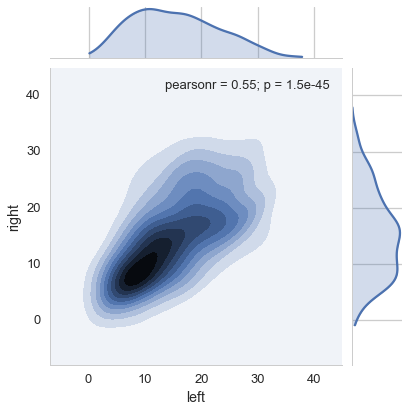

In [18]:
sns.jointplot(x="left", y="right", data=snps_per_end, kind="kde", );

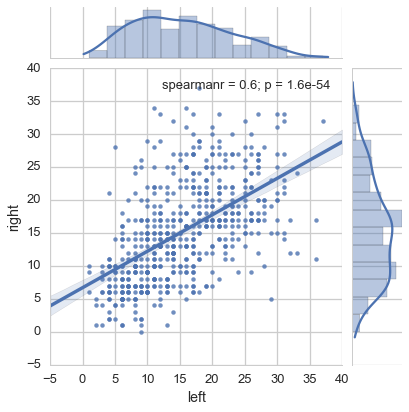

In [19]:
sns.jointplot(x="left", y="right", data=snps_per_end, kind="reg", stat_func=sstats.spearmanr);

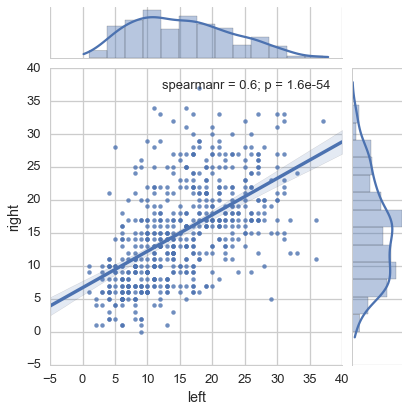

In [20]:
plot = sns.jointplot(x="left", y="right", data=snps_per_end, kind="reg", stat_func=sstats.spearmanr);

In [ ]:
plot.savefig